# Módulo 27: Introducción a Regresión

## Conceptos básicos de regresión
- https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86
- El objetivo final es averiguar los coeficientes óptimos que reduzcan la distancia entre las predicciones y los valores reales
- Puede ser una regresión simple o multivariable
- Esa distancia se llama R2 (Coeficiente de determinación)
- Además, se tiene una serie de premisas que deben respetarse: https://towardsdatascience.com/linear-regression-model-with-python-481c89f0f05b (usando statmodels)
    1. Linearity: The relationship between X and the mean of Y is linear
    2. Normality: The residuals follow a normal distribution and the expected mean of the residuals is zero
    3. Homoscedasticity: The variance of residual is constant for all values of X
    4. No autocorrelation: Residuals are independent from each other
    5. No multicolinearity: Thhere is no high correlation between predictor variables
- Ref: https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

## Descripción de los campos
- price
- area
- bedrooms
- barhrooms
- stories
- mainroad
- guestroom
- basement
- hotwaterheating
- airconditioning
- parking
- prefarea
- furnishingstatus
- En este caso se quiere predecir el costo de la casa

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Housing.csv')
df.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
78,6650000,5700,3,1,1,yes,yes,yes,no,yes,2,yes,furnished
453,3150000,3069,2,1,1,yes,no,no,no,no,1,no,unfurnished
324,4007500,4500,3,1,2,no,no,yes,no,yes,0,no,semi-furnished
444,3220000,3120,3,1,2,no,no,no,no,no,0,no,furnished
512,2520000,3000,2,1,2,yes,no,no,no,no,0,no,furnished


# Exploratory Data Analysis

In [5]:
# Revisar para si existen campos nulos
print(f'Existen {df.isnull().sum().sum()} campos nulos en el dataset')

Existen 0 campos nulos en el dataset


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.00,4766729.25,1870439.62,1750000.00,3430000.00,4340000.00,5740000.00,13300000.00
area,545.00,5150.54,2170.14,1650.00,3600.00,4600.00,6360.00,16200.00
bedrooms,545.00,2.97,0.74,1.00,2.00,3.00,3.00,6.00
bathrooms,545.00,1.29,0.50,1.00,1.00,1.00,2.00,4.00
stories,545.00,1.81,0.87,1.00,1.00,2.00,2.00,4.00
parking,545.00,0.69,0.86,0.00,0.00,0.00,1.00,3.00


In [12]:
# Cambiar el formato gráfico
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [14]:
# Revisar si una columna solamente tiene un valor único para poderlo quitar
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

### Insights
- Se debe cambiar las columnas que tienen valores en cadenas a numeros 1/0
- Se debe cambiar furnishingstatus a 1/2/3
- El dataset no tiene campos en nulo
---

## Feature Engineering

In [19]:
# Cambiar las columnas categóricas (Yes/No) y (True/False) por (1/0)
df['mainroad'] = df['mainroad'].replace({'yes': 1, 'no': 0}, regex=True)
df['guestroom'] = df['guestroom'].replace(to_replace={'yes':1, 'no':2}, regex=True)
df['basement'] = df['basement'].replace(to_replace={'yes': 1, 'no': 0}, regex=True)
df['hotwaterheating'] = df['hotwaterheating'].replace(to_replace={'yes': 1, 'no': 0}, regex=True)
df['airconditioning'] = df['airconditioning'].replace(to_replace={'yes': 1, 'no': 0}, regex=True)
df['prefarea'] = df['prefarea'].replace(to_replace={'yes': 1, 'no': 0}, regex=True)
df['furnishingstatus'] = df['furnishingstatus'].replace(to_replace={'unfurnished': 3, 'semi-furnished': 2, 'furnished': 1}, regex=True)

In [20]:
df.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
154,5530000,3650,3,2,2,1,2,0,0,0,2,0,2
471,3010000,3750,3,1,2,1,2,0,0,0,0,0,3
307,4165000,4080,3,1,2,1,2,0,0,0,2,0,2
132,5810000,5200,3,1,3,1,2,0,0,1,0,0,2
42,7700000,6480,3,2,4,1,2,0,0,1,2,0,3


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


## Análisis de Correlación / Análisis Bivariado

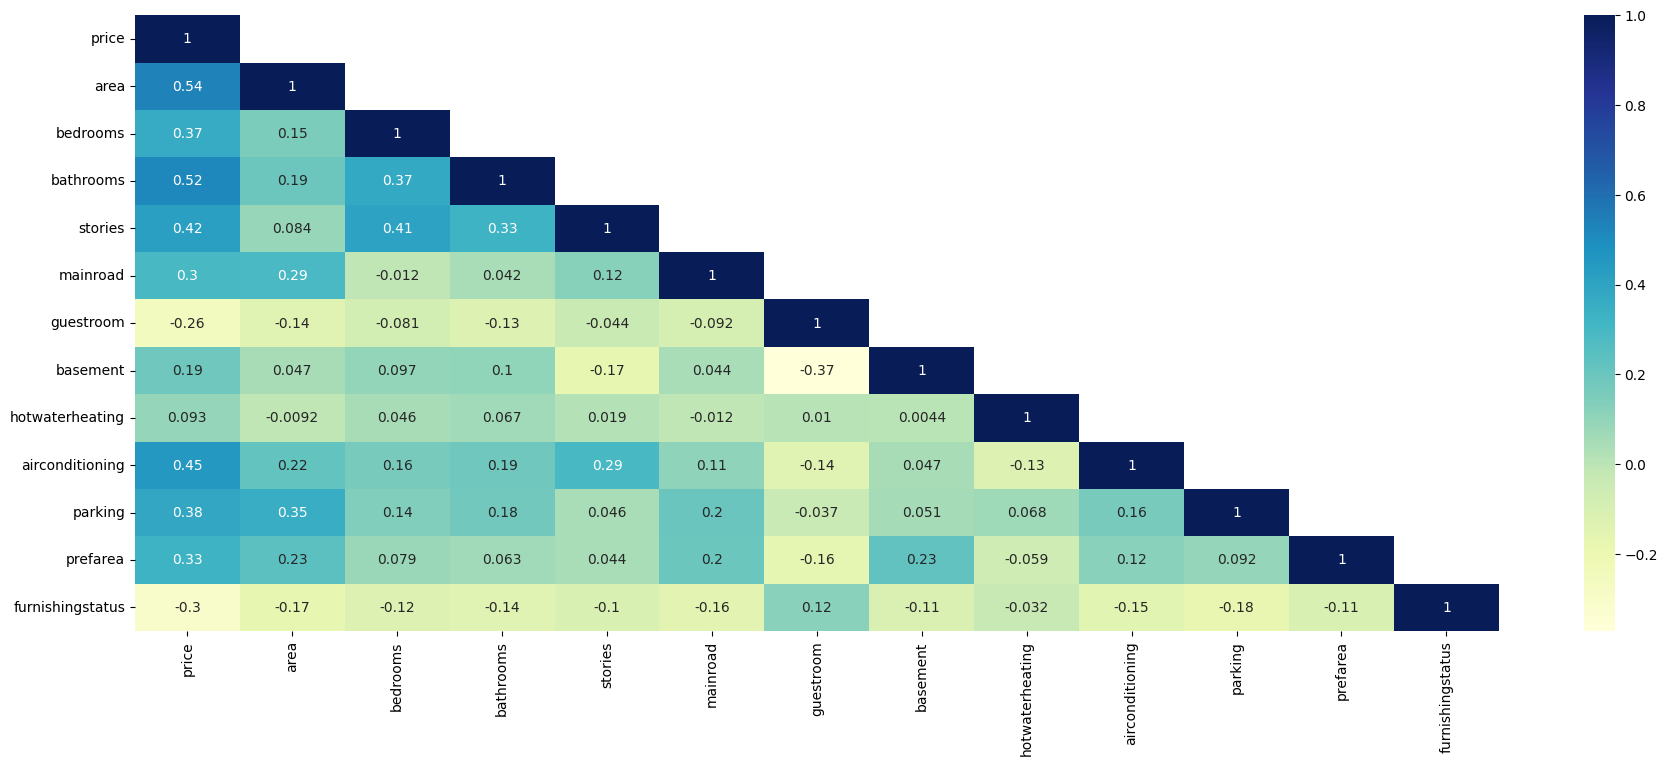

In [24]:
# Heatmap de correlación
plt.figure(figsize=(22,8))
corr_df = df.corr(method='pearson')
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))
hmap = sns.heatmap(df_lt, cmap='YlGnBu', annot=True)

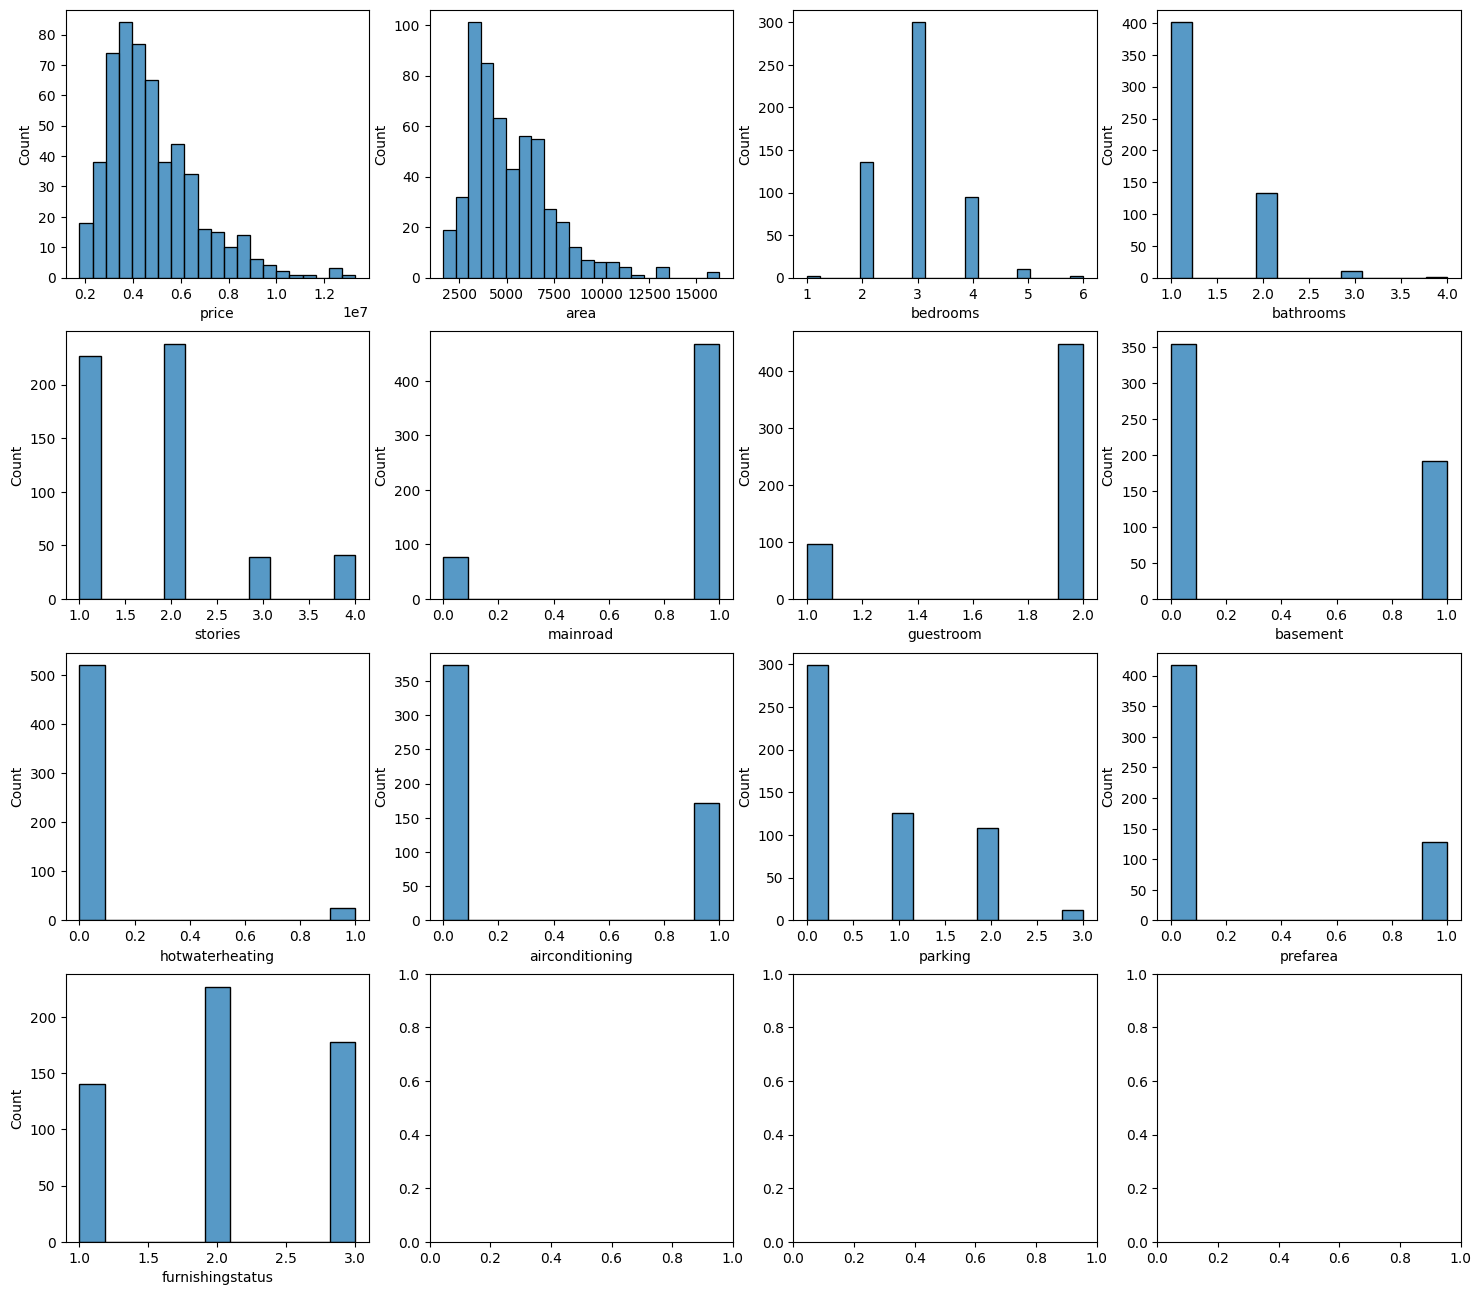

In [26]:
# Gráficas de distribución de las variables
columns = df.columns

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(18,16))

for i, column in enumerate(columns):
    sns.histplot(data=df[column], ax=ax[i//4, i%4], kde=False)